<a href="https://colab.research.google.com/github/Negi270804/Hotel-Booking-Project/blob/main/Nikhil_Negi_Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - HOTEL BOOKING



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Nikhil Negi


# **Project Summary - Factors Affecting the Hotel Booking

This EDA project analyzes a hotel booking dataset to uncover factors influencing booking confirmations and cancellations.The findings support better pricing, inventory planning, and customer targeting for improved booking retention.


# **GitHub Link -**

https://github.com/Negi270804/Hotel-Booking-Project.git

# **Problem Statement**


To analyze hotel booking data and identify key factors that influence booking confirmations or cancellations.
The goal is to uncover patterns using data visualization to support better decision-making in pricing, customer targeting, and room management.


#### **Define Your Business Objective?**

The objective is to help the hotel management improve booking retention and reduce cancellations by identifying actionable insights from historical booking data. This includes optimizing pricing strategies, targeting high-conversion customer segments, and managing room inventory more effectively based on booking trends.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [83]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [84]:
#importing the Dataset
df=pd.read_excel("/content/drive/MyDrive/datasets/Hotel Bookings.xlsx")

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [86]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [87]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [88]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [89]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(31994)

#### Missing Values/Null Values

In [90]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

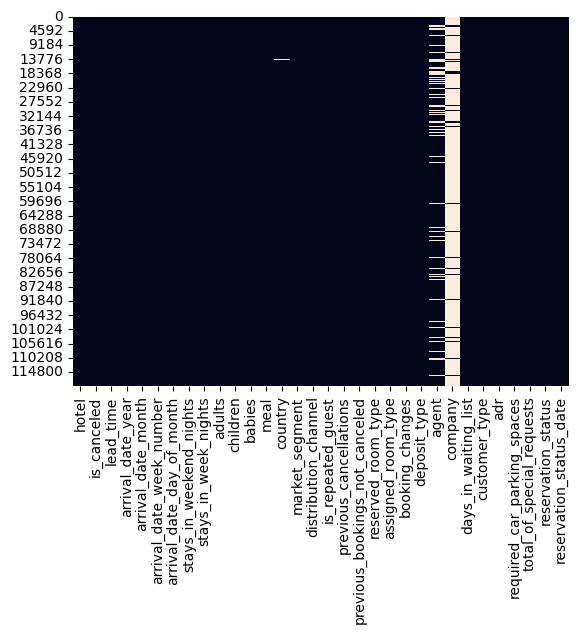

In [91]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains detailed records of hotel bookings from two types of hotels: City Hotel and Resort Hotel. It provides a wide range of information about booking behavior, customer types, stay duration, and cancellations.

🗂 Dataset Structure: Total Columns: 32

Total Records (before cleaning): Approximately 119390

Duplicate Records: 31,994 (which need to be handled during data cleaning)

File Format: Excel (.xlsx)

Sheet Name: “Hotel Bookings”



## ***2. Understanding Your Variables***

In [92]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [93]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### Variables Description

Hotel : Type of hotel (Resort Hotel or City Hotel) – Categorical

Is Canceled : Booking status – 1 = Canceled, 0 = Not Canceled – Numerical (Binary)

Lead Time : Number of days between booking and arrival – Numerical

Arrival Date Year : Year of arrival date – Numerical

Arrival Date Month : Month of arrival date – Categorical

Arrival Date Week Number : Week number of the year for arrival – Numerical

Arrival Date Day of Month : Day of the month of arrival – Numerical

Stays in Weekend Nights : Number of weekend nights stayed – Numerical

Stays in Week Nights : Number of week nights stayed – Numerical

Adults : Number of adults – Numerical

Children : Number of children – Numerical

Babies : Number of babies – Numerical

Meal : Type of meal booked (BB, HB, FB, SC) – Categorical

Country : Country of the guest – Categorical

Market Segment : Booking channel (e.g., Online TA, Direct) – Categorical

Distribution Channel : How booking info was distributed – Categorical

Is Repeated Guest : Whether the guest has stayed before – 1 = Yes, 0 = No – Binary

Previous Cancellations : Number of earlier canceled bookings – Numerical

Previous Bookings Not Canceled : Number of earlier bookings not canceled – Numerical

Reserved Room Type : Room type requested by guest – Categorical

Assigned Room Type : Room type actually assigned – Categorical

Booking Changes : Number of changes made to booking – Numerical

Deposit Type : Type of deposit (No Deposit, Non-Refund, Refundable) – Categorical

Agent : ID of booking agent – Numerical / Categorical

Company : ID of booking company – Numerical / Categorical

Days in Waiting List : Days booking spent on the waiting list – Numerical

Customer Type : Type of customer (e.g., Transient, Group) – Categorical

ADR : Average Daily Rate (total revenue per night) – Numerical

Required Car Parking Spaces : Number of car parking spaces needed – Numerical

Total of Special Requests : Number of special requests made by guest – Numerical

Reservation Status : Final booking status (Canceled, Check-Out, No-Show) – Categorical

Reservation Status Date : Date on which reservation status was updated – Date/Time

### Check Unique Values for each variable.

In [94]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [95]:
# Remove duplicates rows
df.drop_duplicates(inplace=True)

In [96]:
# Drop unnecessary columns
df.drop(columns=["lead_time", "reservation_status_date",'babies','days_in_waiting_list'], inplace=True)

In [97]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 hotel                                 0
is_canceled                           0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137
customer_type                         0
adr                   

In [98]:
# Handling the Missing Values
df.dropna(inplace=True)

In [99]:
# Convert arrival month name to numeric
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

In [101]:
print(df['is_canceled'].value_counts())

is_canceled
0    173
1     16
Name: count, dtype: int64


In [100]:
# Basic summary
print("\nDataset Summary:\n", df.describe(include='all'))


Dataset Summary:
                hotel  is_canceled  arrival_date_year  arrival_date_month  \
count            189   189.000000         189.000000          189.000000   
unique             2          NaN                NaN                 NaN   
top     Resort Hotel          NaN                NaN                 NaN   
freq             150          NaN                NaN                 NaN   
mean             NaN     0.084656        2015.486772            9.058201   
std              NaN     0.279109           0.740963            3.092854   
min              NaN     0.000000        2015.000000            1.000000   
25%              NaN     0.000000        2015.000000            8.000000   
50%              NaN     0.000000        2015.000000           11.000000   
75%              NaN     0.000000        2016.000000           11.000000   
max              NaN     1.000000        2017.000000           12.000000   

        arrival_date_week_number  arrival_date_day_of_month  \
count

### What all manipulations have you done and insights you found?

Manipulations are done-

1) Remove Duplicates Rows

2) Remove Unwanted Columns

3) Check for Missing Values

4) Handling the Missing Values

5) Convert Arrival Month to Numeric

6) Basic Summary

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Pie Chart Booking Status Distribution

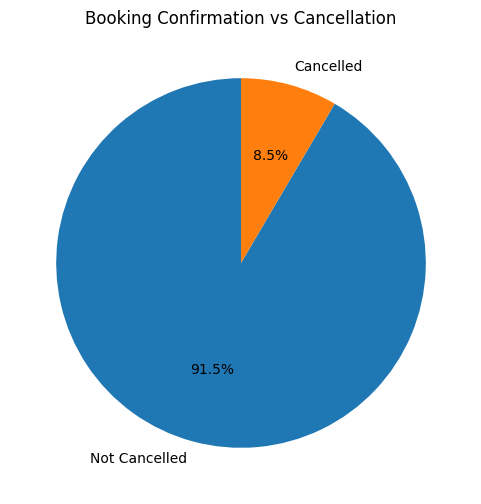

In [102]:
status_counts = df['is_canceled'].replace({0: 'Not Cancelled', 1: 'Cancelled'}).value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking Confirmation vs Cancellation')
plt.show()

##### 1. Why did you pick the specific chart?

A **pie chart** was chosen to clearly show the **proportion** of cancelled vs. confirmed bookings. It provides an immediate visual comparison of the two categories as parts of a whole.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of booking statuses based on the is_canceled variable (0 = Not Canceled, 1 = Canceled).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, identifying that a significant portion of cancellations comes from specific segments (like online bookings or high-priced rooms) helps the business target improvements in pricing, policies, and customer engagement to reduce cancellations.

**Negative Growth Insight:**
Overpricing rooms may lead to increased cancellations, negatively affecting revenue and occupancy.
Relying heavily on online channels with high cancellation rates can inflate booking expectations and misguide inventory planning.


#### Chart - 2 : Bar Graph for Hotel type v/s Booking Status

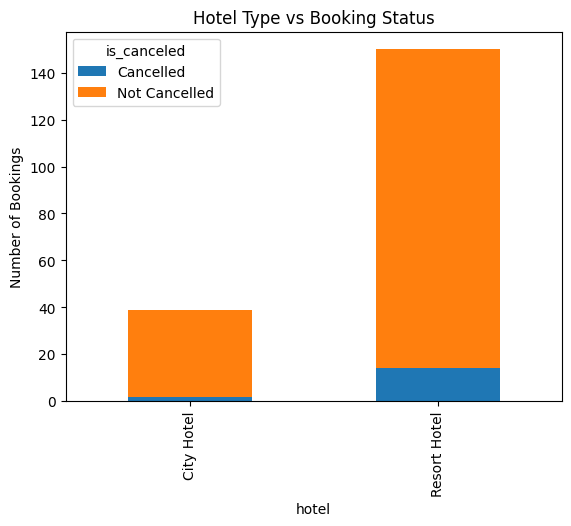

In [103]:
# Replace values in 'is_canceled' column
df['is_canceled'] = df['is_canceled'].replace({0: 'Not Cancelled', 1: 'Cancelled'})

# Group and plot
hotel_status = df.groupby(['hotel', 'is_canceled']).size().unstack()
hotel_status.plot(kind='bar', stacked=True)
plt.title('Hotel Type vs Booking Status')
plt.ylabel('Number of Bookings')
plt.show()

##### 1. Why did you pick the specific chart?

A **stacked bar chart** was used to compare booking status across different hotel types, showing both total volume and the proportion of cancellations. It helps visualize how cancellations vary between hotel categories in a single, clear view.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that **City Hotels** have a higher number of both bookings and cancellations compared to **Resort Hotels**. This suggests that City Hotels may face more volatility and need better cancellation management strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Yes, identifying that **City Hotels face more cancellations** allows management to improve retention strategies like flexible pricing or targeted offers, leading to higher confirmed bookings.

**Negative Growth Insight:**
The **higher cancellation rate in City Hotels** may indicate poor customer satisfaction or overreliance on volatile booking sources, potentially leading to revenue loss and inefficient inventory use.


#### Chart - 3 : Histogram for Number of Adults

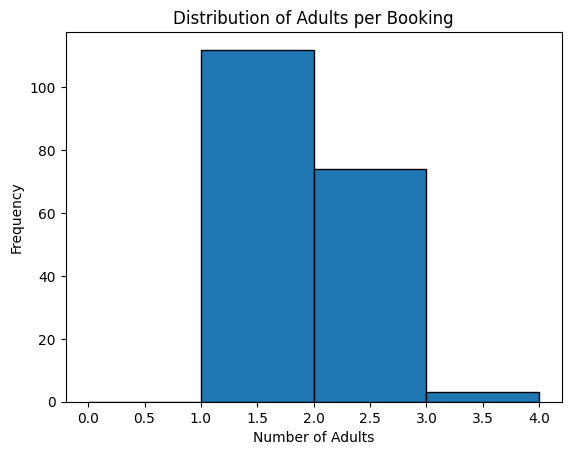

In [104]:
plt.hist(df['adults'], bins=range(0, 5), edgecolor='black')
plt.title('Distribution of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was used to show the frequency distribution of adult guests per booking, helping identify common booking sizes.
It effectively highlights how many bookings are made for individuals, couples, or small groups.

##### 2. What is/are the insight(s) found from the chart?

Insights from this chart:
Most bookings are for two adults, followed by single adult bookings.
Group bookings (3 or more adults) are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
We knowing that most guests book for 1–2 adults enables the hotel to optimize room configurations and targeted offers for couples or solo travelers.

Negative Growth Insight:
The low rate of group bookings may reflect missed opportunities in the group or family segment, suggesting a need to diversify marketing or packages.

#### Chart - 4 : Booking Status by Market Segment

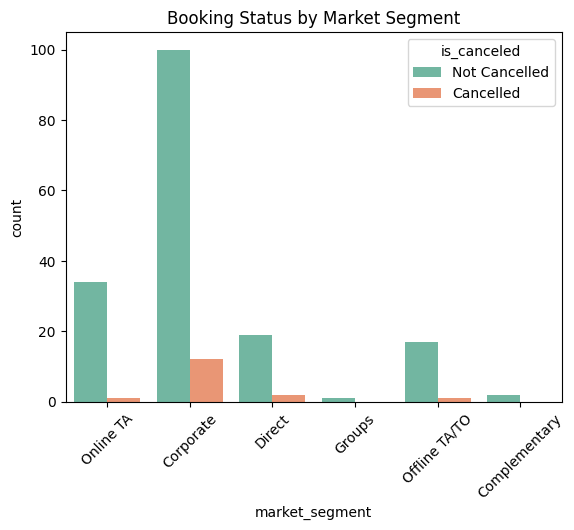

In [105]:
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='Set2')
plt.title('Booking Status by Market Segment')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue was used to compare cancellation patterns across different market segments.
It clearly shows both total bookings and their split between cancelled and confirmed within each segment.

##### 2. What is/are the insight(s) found from the chart?

Online and offline segments have the highest number of cancellations.
Corporate and aviation segments show lower cancellation rates, indicating more reliable bookings.

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
We focusing on corporate and aviation segments can help increase confirmed bookings and reduce revenue loss.
Insights can guide targeted marketing and partnership strategies for high-retention segments.

Negative Growth Insight:
Overdependence on online segments with high cancellations can lead to unreliable occupancy forecasts.
This may cause overbooking, staffing inefficiencies, and mismanaged resources.

#### Chart - 5 : Room Type Reserved Count

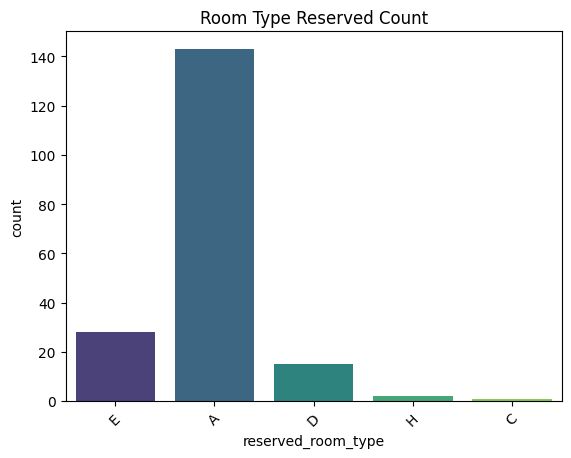

In [106]:
sns.countplot(data=df, x='reserved_room_type', palette='viridis')
plt.title('Room Type Reserved Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A **countplot** effectively displays the **frequency of each reserved room type**, making it easy to identify the most and least popular options.
It’s ideal for comparing categorical data like room types.

##### 2. What is/are the insight(s) found from the chart?

**Room Type A** is the most frequently reserved, followed by a few others like `D` and `E`.
Some room types like `H` or `L` are rarely booked, indicating low demand.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Focusing inventory and marketing on high-demand room types (like A) can improve occupancy and revenue.
It also supports pricing optimization for popular options.

Negative Growth Insight:
Underutilized room types increase operational costs and reduce overall efficiency.
These may need reconfiguration, rebranding, or bundling with offers to improve booking rates.

#### Chart - 6

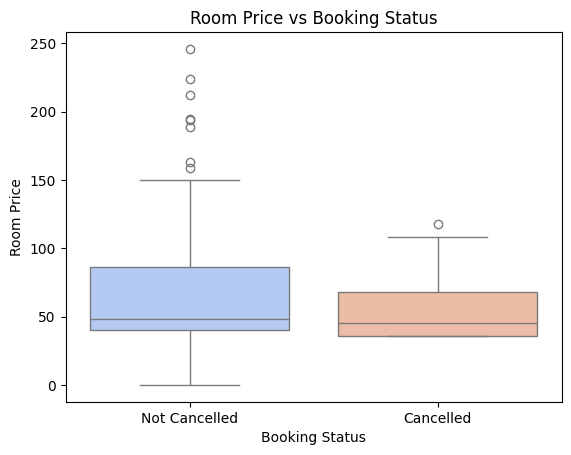

In [107]:
sns.boxplot(data=df, x='is_canceled', y='adr', palette='coolwarm')
plt.title('Room Price vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Room Price')
plt.show()

##### 1. Why did you pick the specific chart?

A **boxplot** was used to compare **room price distribution** (`adr`) across booking statuses, highlighting median, spread, and outliers.
It’s ideal for visualizing how prices differ between cancelled and confirmed bookings.


##### 2. What is/are the insight(s) found from the chart?

**Cancelled bookings** tend to have **higher room prices** than confirmed ones.
Many outliers exist, indicating price spikes in some cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Lowering or optimizing **high-priced room rates** could help reduce cancellations and improve retention.
Dynamic pricing strategies can be adjusted based on booking behavior.

Negative Growth Insight:
**Overpricing** may deter customers and increase cancellations, affecting occupancy and revenue.
Ignoring price sensitivity across segments could harm customer trust and lead to booking drop-offs.

#### Chart - 7

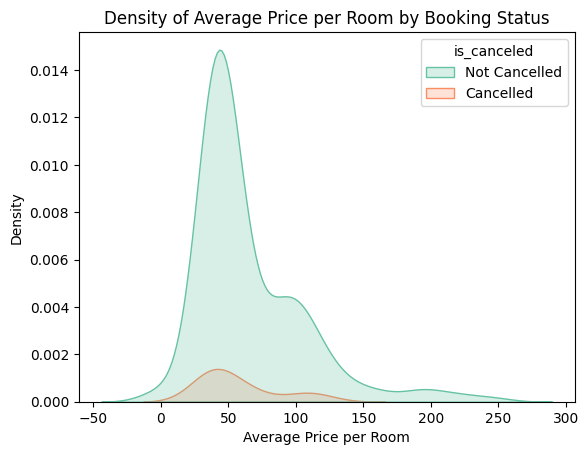

In [108]:
sns.kdeplot(data=df, x='adr', hue='is_canceled',palette = 'Set2', fill=True)
plt.title('Density of Average Price per Room by Booking Status')
plt.xlabel('Average Price per Room')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

A **KDE plot** was chosen to show the **distribution and density** of room prices (`adr`) across booking statuses.
It helps visualize overlapping patterns and pricing trends between cancelled and confirmed bookings.

##### 2. What is/are the insight(s) found from the chart?

Cancelled bookings are **more concentrated at higher room prices**, while confirmed bookings peak at **lower to mid-range prices**.
This indicates a potential pricing sensitivity among customers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Understanding this trend allows hotels to **adjust pricing strategies** to minimize cancellations.
They can offer discounts or added value to retain high-price customers.

**Negative Growth Insight:**
Failing to address **price-driven cancellations** can lead to revenue loss and poor customer retention.
High pricing without perceived value increases the risk of booking drop-offs.

#### Chart - 8

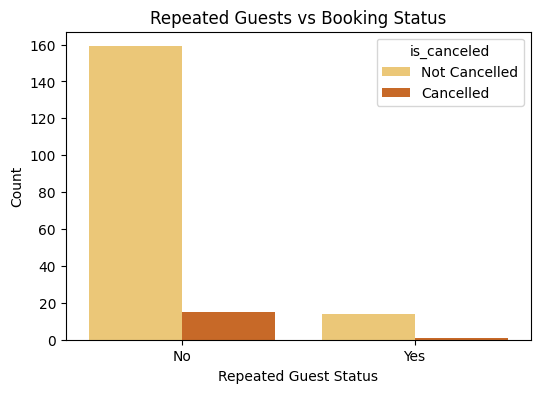

In [109]:
if 'is_repeated_guest' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled', palette='YlOrBr')
    plt.title('Repeated Guests vs Booking Status')
    plt.xlabel('Repeated Guest Status')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

##### 1. Why did you pick the specific chart?

A **countplot with hue** is ideal to compare **booking status** between **first-time and repeated guests**, showing how guest loyalty relates to cancellations.
It clearly visualizes both frequency and behavior patterns by group.


##### 2. What is/are the insight(s) found from the chart?

**Repeated guests have very low cancellation rates**, while most cancellations come from **first-time guests**.
This indicates stronger commitment from loyal customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Encouraging **guest loyalty programs** and repeat visits can improve booking retention and reduce cancellations.
Hotels can personalize offers or give incentives to repeat guests for higher lifetime value.

**Negative Growth Insight:**
Neglecting repeat customers or not nurturing loyalty may lead to **more volatile bookings and higher cancellation rates**.
Over-reliance on new guests increases acquisition costs and weakens customer trust.

#### Chart - 9

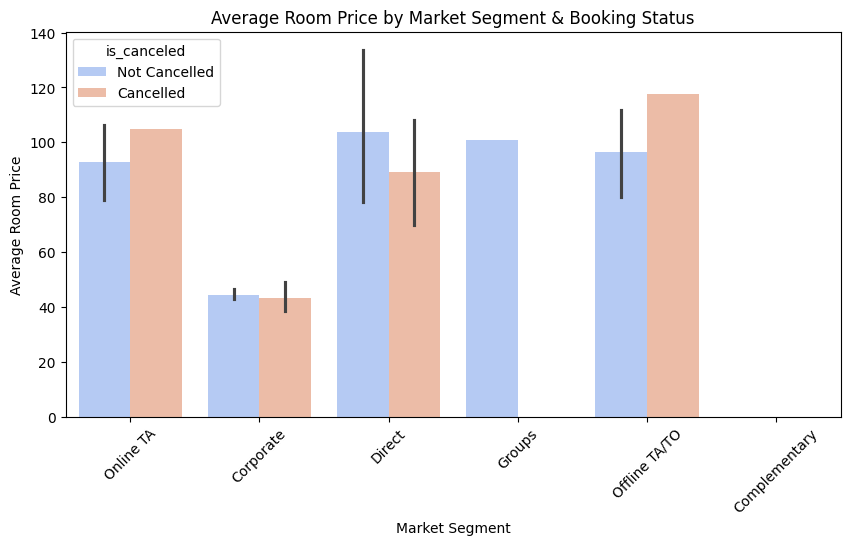

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='market_segment', y='adr', hue='is_canceled', palette='coolwarm')
plt.title('Average Room Price by Market Segment & Booking Status')
plt.xlabel('Market Segment')
plt.ylabel('Average Room Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A **barplot** with hue was selected to compare the **average room price (ADR)** across different **market segments** for both cancelled and confirmed bookings.
It clearly highlights price differences and cancellation behavior across segments.

##### 2. What is/are the insight(s) found from the chart?

**Online and offline bookings** show higher average prices among **cancelled bookings**.
**Corporate and aviation segments** have lower ADRs and fewer cancellations, indicating reliable revenue sources.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Focusing on **low-cancellation, stable segments** like corporate can improve revenue consistency.
Segment-based pricing adjustments can be made to reduce price-driven cancellations.

**Negative Growth Insight:**
Relying on **high-ADR online channels** increases risk of cancellation and revenue loss.
Failure to adjust prices or manage these segments could result in **wasted resources and poor forecasting**.

#### Chart - 10

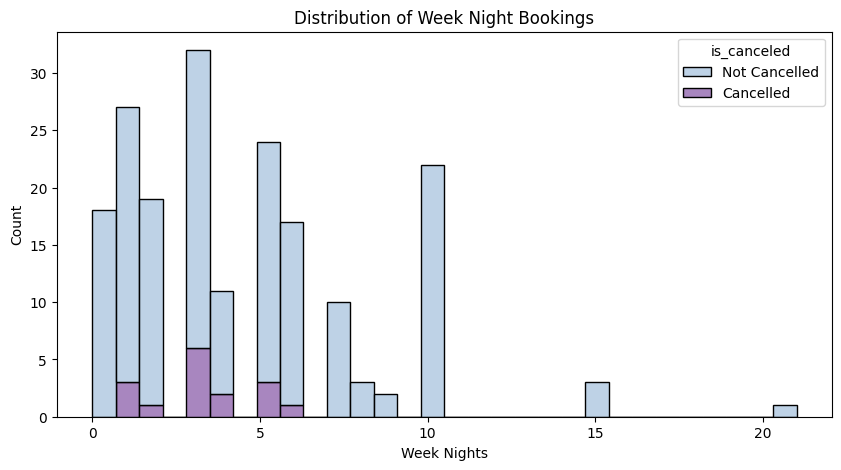

In [111]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='stays_in_week_nights', hue='is_canceled', multiple='stack', bins=30, palette='BuPu')
plt.title('Distribution of Week Night Bookings')
plt.xlabel('Week Nights')
plt.show()

##### 1. Why did you pick the specific chart?

A **stacked histogram** was chosen to show the **distribution of weeknight stays** for both cancelled and confirmed bookings.
It’s effective for comparing frequency patterns between categories over a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Most bookings involve **1–3 weeknights**, and cancellations are more frequent in **shorter stays**.
Longer weeknight stays are more likely to be confirmed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Encouraging **longer stays** (e.g., offering discounts or loyalty points) could reduce cancellations and increase revenue per booking.
This insight supports targeted stay-length promotions.

**Negative Growth Insight:**
**Short-stay bookings** are more volatile and may inflate cancellation rates if unmanaged.
Relying heavily on short-term travelers could reduce booking stability and operational efficiency.

#### Chart - 11 - Average Daily Rate By Month

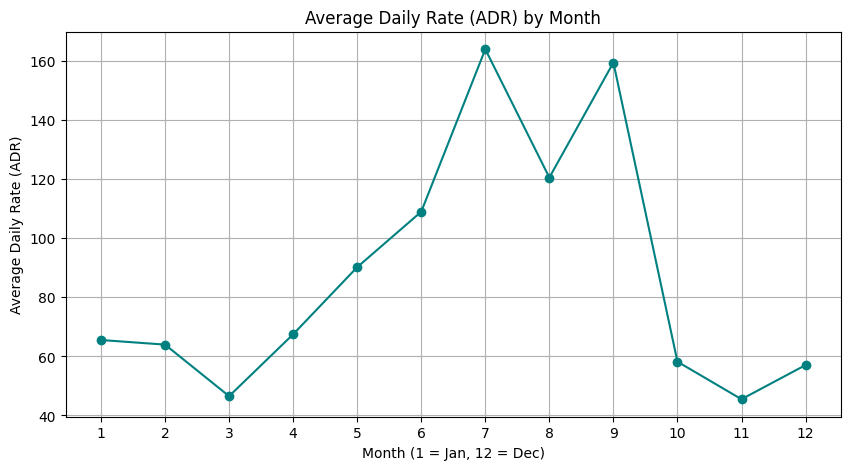

In [116]:
# Group by month and calculate average ADR
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 5))
monthly_adr.plot(kind='line', marker='o', color='teal')
plt.title("Average Daily Rate (ADR) by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Daily Rate (ADR)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

##### 1. Why did you pick the specific chart?

A **line chart** is ideal for showing **trends over time**, such as how room prices (`adr`) fluctuate across months.
It helps visualize seasonal pricing patterns and demand cycles.

##### 2. What is/are the insight(s) found from the chart?

**ADR peaks during certain months** (e.g., summer or holidays), indicating high-demand seasons.
Lower ADRs in off-seasons may reflect discounts or low occupancy periods.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Identifying **high and low demand months** helps optimize **seasonal pricing and promotions**, boosting revenue.
Hotels can plan staffing, marketing, and packages around these trends.

**Negative Growth Insight:**
Ignoring **seasonal fluctuations** can lead to **mispricing**, lost revenue in peak months, or poor occupancy in low seasons.
Overpricing in low-demand periods may further increase cancellations.


#### Chart - 14 - Correlation Heatmap

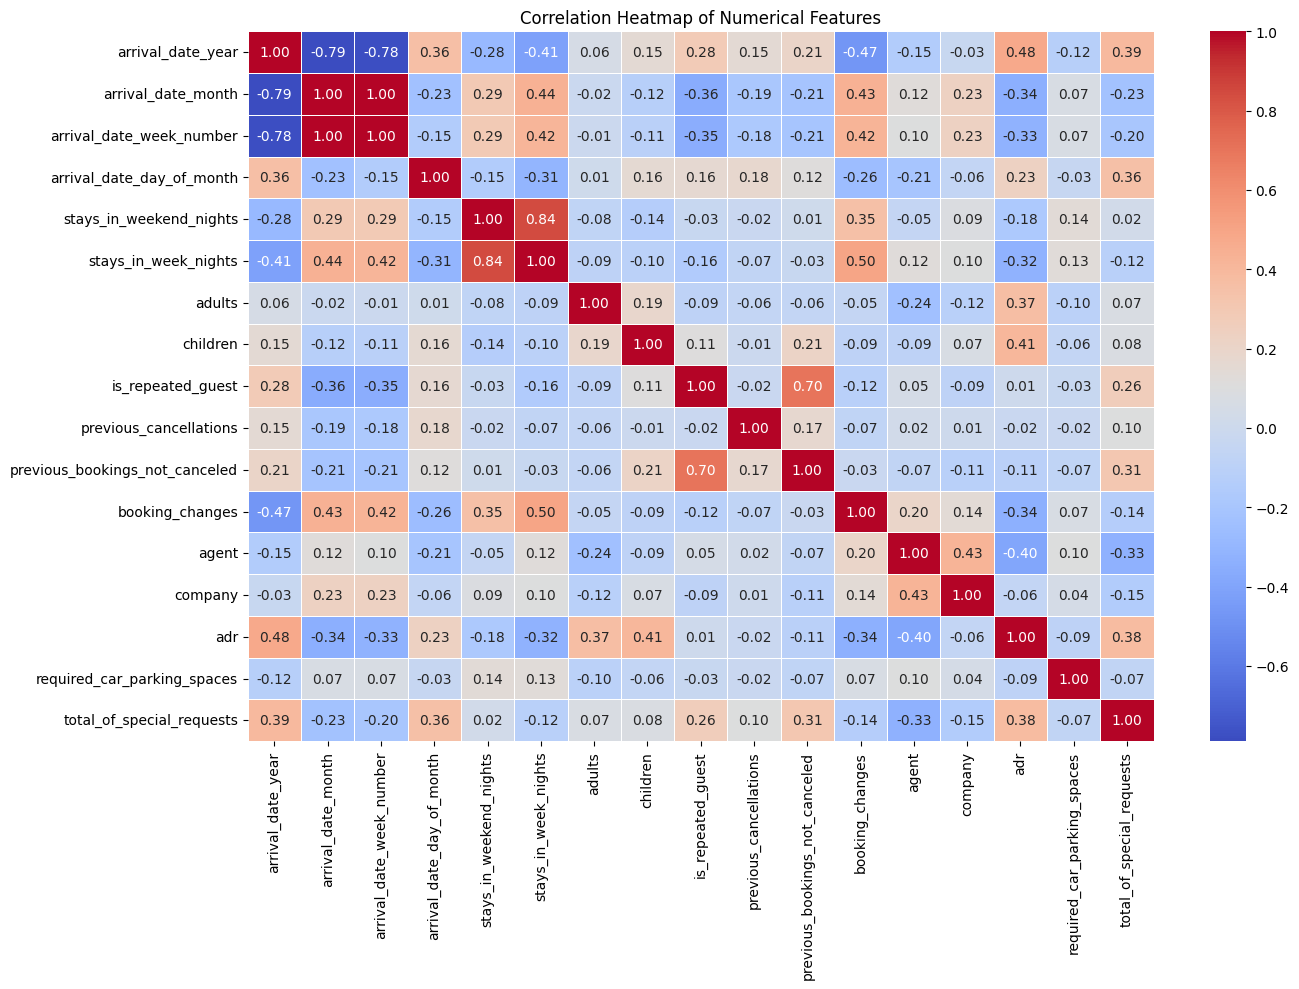

In [113]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **correlation heatmap** visually displays how strongly numerical features are related to each other.
It helps identify patterns, multicollinearity, or key influencing variables in one view.

##### 2. What is/are the insight(s) found from the chart?

Strong correlations were found between `total nights` and individual night stays, and between `adults` and `total guests`.
`is_canceled` has weak correlation with most features, indicating complex cancellation behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Recognizing **strong feature relationships** aids in effective feature selection for predictive modeling and strategy formulation.
It supports focused data-driven decisions.

**Negative Growth Insight:**
Misinterpreting weak correlations as lack of influence may cause **overlooking non-linear relationships**.
Relying solely on correlation may ignore **hidden patterns** that affect business outcomes.


#### Chart - 15 - Pair Plot

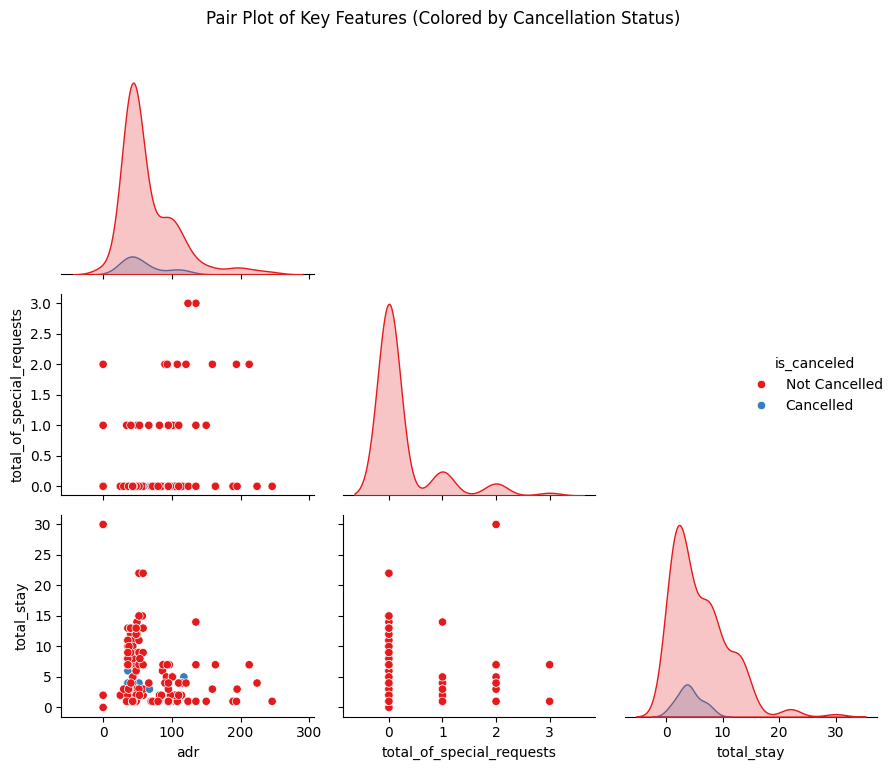

In [115]:
# Creating total_stay column if not already present
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Selecting relevant features
pairplot_data = df[['adr', 'total_of_special_requests', 'total_stay', 'is_canceled']]

# Plotting pair plot with hue = cancellation
sns.pairplot(pairplot_data, hue='is_canceled', palette='Set1', corner=True)

plt.suptitle("Pair Plot of Key Features (Colored by Cancellation Status)", y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **pair plot** was chosen to explore **relationships between multiple numerical features** and how they vary with booking cancellation status.
It visually reveals correlations, clusters, and patterns across feature combinations.

##### 2. What is/are the insight(s) found from the chart?

Bookings with **more special requests and longer stays** tend to have **fewer cancellations**.
Cancellations are more common at **moderate to high price levels** with fewer requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Identifying that **special requests correlate with confirmed bookings** can guide customer engagement and personalization strategies.
Hotels can prioritize service-based value to encourage commitment.

**Negative Growth Insight:**
Neglecting customers with **short stays or no special needs** may lead to **higher cancellations** in those segments.
This can result in missed revenue opportunities and poor retention if left unaddressed.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### ✅ Suggestions to Achieve the Business Objective

---

1. **Implement Dynamic Pricing Strategies**

   * Adjust prices based on demand and seasonality to reduce cancellations during high ADR periods.
   * Offer competitive rates in low seasons to attract more confirmed bookings.

2. **Promote Loyalty and Repeat Guest Programs**

   * Repeated guests showed extremely low cancellation rates.
   * Incentivize return bookings through discounts, perks, and personalized offers.

3. **Focus on Reliable Market Segments**

   * Corporate and aviation segments had fewer cancellations.
   * Strengthen partnerships and marketing efforts in these segments.

4. **Encourage Longer Stays**

   * Longer weeknight and total stays correlated with fewer cancellations.
   * Offer deals or value-added services for extended bookings.

5. **Optimize Room Type Inventory**

   * Room Type A had the highest demand—ensure availability and optimized pricing.
   * Reevaluate low-demand room types for repackaging or promotion.

6. **Manage High-Risk Segments**

   * Online bookings and high-priced reservations had higher cancellation rates.
   * Improve prepayment policies, flexible cancellation options, or personalized communication.

7. **Leverage Special Requests**

   * Guests making special requests are more likely to complete bookings.
   * Use this as a loyalty indicator and provide proactive service to reduce cancellations.

8. **Use Seasonal Trends for Planning**

   * ADR fluctuates monthly—plan promotions, staffing, and inventory accordingly.
   * Capitalize on peak months and support low months with targeted campaigns.

---

# **Conclusion**

### ✅ **Conclusion of the EDA Project on Hotel Booking**

1. **Booking Cancellations Are Significant**

   * A large portion of bookings are canceled, especially from online and high-priced segments.

2. **Room Type A is the Most Preferred**

   * Room Type A has the highest number of bookings, suggesting it should be prioritized in availability and marketing.

3. **Higher Prices Often Lead to More Cancellations**

   * Bookings with higher ADR (average daily rate) are more likely to be canceled, indicating price sensitivity among customers.

4. **Repeat Guests Rarely Cancel**

   * Repeated guests show a strong tendency to complete their bookings, highlighting the importance of customer loyalty.

5. **Longer Stays Are More Stable**

   * Bookings with longer weeknight and weekend stays are less likely to be canceled.

6. **Corporate and Aviation Segments Are Reliable**

   * These market segments have lower cancellation rates and can provide stable revenue streams.

7. **Short-Stay and No-Request Guests Are Riskier**

   * One or two-night stays and guests with no special requests tend to cancel more often.

8. **Seasonality Impacts Pricing and Demand**

   * Room prices vary by month, reflecting demand trends. Peak months show higher ADR.

9. **Special Requests Indicate Booking Confidence**

   * Guests with special requests are more likely to follow through with their bookings.

10. **Feature Correlations Help Target Strategies**

    * Certain features (like total nights, total guests) show strong internal relationships, useful for prediction and strategy planning.

---

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***